In [1]:
# UNSUPERVISED LEARNING
import pandas as pd
df=pd.DataFrame(columns=["calory","breakfast","lunch","dinner","excercise","body_shape"])

In [2]:
df.loc[0] = [1200,1,0,0,2,"Skinny"]
df.loc[1] = [2800,1,1,1,1,"Fat"]
df.loc[2] = [3500,2,2,1,0,"Skinny"]
df.loc[3] = [1400,0,1,0,3,"Skinny"]
df.loc[4] = [1600,1,0,2,0,"Normal"]
df.loc[5] = [3200,1,2,1,1,"Fat"]
df.loc[6] = [1750,1,0,0,1,"Skinny"]
df.loc[7] = [1600,1,0,0,0,"Skinny"]
df.loc[8] = [3600,0,2,0,0,"Normal"]

In [3]:
df.head()

,calory,breakfast,lunch,dinner,excercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Fat
2,3500,2,2,1,0,Skinny
3,1400,0,1,0,3,Skinny
4,1600,1,0,2,0,Normal


In [12]:
# split the data into feature vector and labels
x = df[["calory","breakfast","lunch","dinner","excercise"]]
y = df[['body_shape']]

In [13]:
x

,calory,breakfast,lunch,dinner,excercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,1600,1,0,2,0
5,3200,1,2,1,1
6,1750,1,0,0,1
7,1600,1,0,0,0
8,3600,0,2,0,0


In [14]:
y

,body_shape
0,Skinny
1,Fat
2,Skinny
3,Skinny
4,Normal
5,Fat
6,Skinny
7,Skinny
8,Normal


In [15]:
# rescaling feature vectors to all have the same scale

In [16]:
from sklearn.preprocessing import StandardScaler   # another normalizing tool
x_std = StandardScaler().fit_transform(x)              

In [17]:
x_std

array([[-1.19952596,  0.19611614, -1.01600102, -0.81110711,  1.11803399],
       [ 0.55409575,  0.19611614,  0.12700013,  0.64888568,  0.1118034 ],
       [ 1.32130524,  1.96116135,  1.27000127,  0.64888568, -0.89442719],
       [-0.98032324, -1.56892908,  0.12700013, -0.81110711,  2.12426458],
       [-0.76112053,  0.19611614, -1.01600102,  2.10887847, -0.89442719],
       [ 0.99250117,  0.19611614,  1.27000127,  0.64888568,  0.1118034 ],
       [-0.5967185 ,  0.19611614, -1.01600102, -0.81110711,  0.1118034 ],
       [-0.76112053,  0.19611614, -1.01600102, -0.81110711, -0.89442719],
       [ 1.4309066 , -1.56892908,  1.27000127, -0.81110711, -0.89442719]])

In [18]:
# covariance matrix of features 
#Features are columns from x_std
import numpy as np
features = x_std.T  # T stands for transformation
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.125       0.19210794  1.0091555   0.24558194 -0.55218705]
 [ 0.19210794  1.125      -0.02802012  0.50107425 -0.46867788]
 [ 1.0091555  -0.02802012  1.125       0.11588704 -0.15973927]
 [ 0.24558194  0.50107425  0.11588704  1.125      -0.44888843]
 [-0.55218705 -0.46867788 -0.15973927 -0.44888843  1.125     ]]


In [19]:
# Eigen vectors and Eign values from covariance Matrix
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [20]:
print('\nEigenvalues \n%s' %eig_vals)    # eigen stores the performing indicators 


Eigenvalues 
[2.64513704 1.66455827 0.03436538 0.68526464 0.59567468]


In [22]:
# Reduce dimension to 1 dimension
eig_vals[0] / sum(eig_vals)

0.4702465852201753

In [23]:
# project datapoint onto selected eign ectors
projected_x = x_std.dot(eig_vecs.T[0])

In [24]:
projected_x

array([ 1.90648327, -0.6298733 , -2.6408523 ,  2.32150157, -0.37912475,
       -1.39650774,  1.09077237,  0.71390416, -0.98630328])

In [25]:
result = pd.DataFrame(projected_x,columns=["PC1"])
result["y-axis"] = 0.0
result["label"] = y

In [26]:
result 

,PC1,y-axis,label
0,1.906483,0.0,Skinny
1,-0.629873,0.0,Fat
2,-2.640852,0.0,Skinny
3,2.321502,0.0,Skinny
4,-0.379125,0.0,Normal
5,-1.396508,0.0,Fat
6,1.090772,0.0,Skinny
7,0.713904,0.0,Skinny
8,-0.986303,0.0,Normal


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,1,'PCA result')

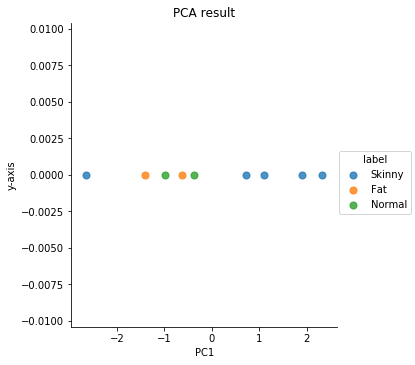

In [28]:
sns.lmplot("PC1","y-axis", data=result, fit_reg=False, scatter_kws={"s":50},hue="label")
# title
plt.title("PCA result")